### Importamos librerías

In [ ]:
import os
import tweepy as tw
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from datetime import datetime
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
print("hola don pepito")

hola don pepito


In [1]:
print ("hola don jose")

hola don jose


### Credenciales para el uso de la API


In [ ]:
consumer_key= 'mEfV8N05qpt3kVQFP2wD5swU5'
consumer_secret= 'vs7zg1AvjK9GUCcYwbQxjypT0h65XdDHurMoopQXzuqnwoRTNY'
access_token= '1267192889416847362-3bkTrmyabVIbjlkpfZRIfsGD0LqwRv'
access_token_secret= 'Sl7gnnajauTISKig3FWiluwWibJXsgYTstuF0JUJta7Qu'

In [ ]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [ ]:
# Creamos una función que nos devuelve la información de los tweets que deseamos

def api_tweets(key_words, language, date_start, n_tweets):

  result = tw.Cursor(api.search,
                    q=key_words,
                    lang=language,
                    since=date_start,
                    tweet_mode='extended').items(n_tweets)

  return result

In [ ]:
search_words = ("telefonica")
lang = "es"
date_since = "2020-06-01"
n_tweets = 50

tweets = api_tweets(search_words, lang, date_since, n_tweets)

In [ ]:
for tweet in tweets:
  tweet_d = dict(tweet._json)
  print(tweet_d['coordinates'])

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
{'type': 'Point', 'coordinates': [113.9341535, 22.3144511]}
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


KeyboardInterrupt: ignored

### Creamos el dataframe

In [ ]:
# Creamos un df vacío con las columnas que vamos a completar

df = pd.DataFrame(columns=['text', 'created_at', 'created_at_time', 'created_at_hour', 'retweeted', 'retweet_count', 'favorite_count', 
                           'user_ verified', 'user_id', 'user_name', 'user_location', 'user_notificacion', 'user_followers', 'user_friends', 
                           'user_withheld_in_countries', 'mentions_in_tweet', 'is_reply', 'source_device', 'finished_tweet', 
                           'status_count', 'hashtags_text','hastags_indices', 'hastags_in_tweet'])

i = 0

for tweet in tweets:

    # Convertimos el json de cada uno de los tweets en un diccionario
    tweet_d = dict(tweet._json)

    # Creo un estado para coger el texto completo
    status = api.get_status(tweet_d['id'], tweet_mode="extended")
    try:
      text = status.retweeted_status.full_text
      rt = 'Si'
    except AttributeError:  # Not a Retweet
      text = status.full_text
      rt = 'No'
    
    # Creamos una variable que nos dice el número de menciones en el tweet
    try:
        mentions_in_tweet = len(tweet_d['entities']['user_mentions'])
    except:
        mentions_in_tweet = 0

    # Creamos una variable que nos dice si el tweet es una respuesta
    if tweet_d['in_reply_to_screen_name'] == None:
      reply = 'No'
    else:
      reply = tweet_d['in_reply_to_screen_name']

    # Cogemos la fecha del tweet y dividimos en día y hora
    fecha_completa = str(tweet_d['created_at'])
    fecha = fecha_completa.split(sep = ' ')
    texts_date = ' '.join(elemento for elemento in fecha[0:3])
    texts_time = fecha[3] 

    # Creamos una columna que corresponde con las horas, para representarla
    hora = fecha[3].split(sep = ':')
    texts_hour = int(hora[0])

    # Exportamos los hastag del tweet y las posiciones
    aux = list([i["text"] for i in tweet.entities['hashtags']]) 
    aux_pos = [i["indices"] for i in tweet.entities['hashtags']]
    
    # Creamos una fila con la información que queremos almacenar de cara al análisis
    new_row = {
        
    'text': text,

    'created_at': texts_date,
    'created_at_time': texts_time,
    'created_at_hour': texts_hour,

    'retweeted': rt,

    'retweet_count': tweet_d['retweet_count'],
    'favorite_count': tweet_d['favorite_count'],

    'user_verified': tweet_d['user']['verified'], # ---------------------- ALGO PASA CON ESTO, DEVUELVE TODO NaN
    'user_id': tweet_d['user']['id'],
    'user_name': tweet_d['user']['screen_name'],
    'user_location': tweet_d['user']['location'],
    'user_notificacion': tweet.user.notifications,
    'user_followers': tweet_d['user']['followers_count'],
    'user_friends': tweet_d['user']['friends_count'],
    'user_withheld_in_countries':  tweet.user.withheld_in_countries,

    'mentions_in_tweet': mentions_in_tweet,   
    'is_reply': reply,

    'source_device':tweet.source,
    'finished_tweet': tweet.truncated, # Si está incompleto el tweet (hilo)

    'status_count':tweet.user.statuses_count, # ¿QUÉ ES ESTO? interacciones del usuario tanto tweets como retweets 

    'hashtags_text': aux,
    'hastags_indices': aux_pos,
    'hastags_in_tweet': len(aux)

    }
    
    # Añadimos la info al dataframe en una nueva fila
    df.loc[i] = new_row

    i = i + 1


In [ ]:
#Opción 2 para construir el DataFrame. Creo que va un poco más rápido

def create_tweet_DF(tweets):
  my_list_of_dicts = []

  for each_json_tweet in tweets:
      my_list_of_dicts.append(each_json_tweet._json)

  my_demo_list = []
  for each_dictionary in my_list_of_dicts:
    
    text = each_dictionary['full_text']
    created_at = each_dictionary['created_at']
    favorite_count = each_dictionary['favorite_count']
    retweeted = each_dictionary['retweeted']
    retweet_count = each_dictionary['retweet_count']
    user_id = each_dictionary['user']['id']
    user_name = each_dictionary['user']['name']
    user_verified = each_dictionary['user']['verified']
    user_location = each_dictionary['user']['location']
    user_notificacion = each_dictionary['user']['notifications']
    user_followers = each_dictionary['user']['followers_count']
    user_friends = each_dictionary['user']['friends_count']
    user_geo_enabled = each_dictionary['user']['geo_enabled']
    
    my_demo_list.append({'text': str(text),
                        'created_at': created_at,
                        'favorite_count': int(favorite_count),
                        'retweeted': bool(retweeted),
                        'retweet_count': int(retweet_count),
                        'user_id': str(user_id),
                        'user_name': str(user_name),
                        'user_verified': bool(user_verified),
                        'user_location': str(user_location),
                        'user_notificacion': bool(user_notificacion),
                        'user_followers': int(user_followers),
                        'user_friends': int(user_friends),
                        'user_geo_enabled': bool(user_geo_enabled)
                        })
    
    tweet_json = pd.DataFrame(my_demo_list, columns = ['text', 'created_at', 'favorite_count', 'retweeted', 
                                                      'retweet_count', 'user_id', 'user_name', 'user_verified', 
                                                      'user_location', 'user_notificacion', 'user_followers', 
                                                      'user_friends', 'user_geo_enabled'])
    return tweet_json


In [ ]:
df = create_tweet_DF(tweets)

Limpiar tildes:

In [ ]:
def eliminar_tildes(texto):
    texto_limpio = re.sub('(á)|(Á)|(à)|(À)','a', texto)
    texto_limpio = re.sub('(é)|(É)|(è)|(È)','e', texto_limpio)
    texto_limpio = re.sub('(í)|(Í)|(ì)|(Ì)','i', texto_limpio)
    texto_limpio = re.sub('(ó)|(Ó)|(ò)|(Ò)','o', texto_limpio)
    texto_limpio = re.sub('(ú)|(Ú)|(ù)|(Ù)','u', texto_limpio)
    return texto_limpio

In [ ]:
df['text_limpio']=df['text'].apply(lambda x: eliminar_tildes(x))

In [ ]:
df

,text,created_at,created_at_time,created_at_hour,retweeted,retweet_count,favorite_count,user_ verified,user_id,user_name,user_location,user_notificacion,user_followers,user_friends,user_withheld_in_countries,mentions_in_tweet,is_reply,source_device,finished_tweet,status_count,hashtags_text,hastags_indices,hastags_in_tweet,text_limpio
0,Sostuve fraternal conversación telefónica con ...,Thu Jul 29,17:51:35,17,Si,891,0,NaN,615595760,DANILORAMON1955,,False,10671,10601,[],2,No,Twitter for Android,False,232169,[],[],0,Sostuve fraternal conversación telefónica con ...
1,"@TELMEXSoluciona @Telmex un asco, se va la se...",Thu Jul 29,17:50:46,17,No,0,0,NaN,231622052,kunkun1906,México D.F.,False,221,499,[],3,TELMEXSoluciona,Twitter for Android,False,1359,[],[],0,"@TELMEXSoluciona @Telmex un asco, se va la se..."
2,"🗣️ ¡𝐓𝐨𝐦𝐚 𝐍𝐨𝐭𝐚!✍️ 🇻🇪 \nMin. de Ecosocialismo, @...",Thu Jul 29,17:50:45,17,Si,52,0,NaN,1213120844349595653,chiqui_rosy,,False,700,731,[],2,No,Twitter for Android,False,84182,[],[],0,"🗣️ ¡𝐓𝐨𝐦𝐚 𝐍𝐨𝐭𝐚!✍️ 🇻🇪 \nMin. de Ecosocialismo, @..."
3,@ChiChoLuna24RD @EdeesteRD Siempre por vía tel...,Thu Jul 29,17:50:40,17,No,0,0,NaN,193122760,PalyAluyaTM,,False,302,819,[],2,ChiChoLuna24RD,Twitter for Android,False,35613,[],[],0,@ChiChoLuna24RD @EdeesteRD Siempre por vía tel...
4,"🗣️ ¡𝐓𝐨𝐦𝐚 𝐍𝐨𝐭𝐚!✍️ 🇻🇪 \nMin. de Ecosocialismo, @...",Thu Jul 29,17:50:40,17,Si,52,0,NaN,1321550977313419264,emely7840,,False,161,162,[],2,No,Twitter for Android,False,24944,[],[],0,"🗣️ ¡𝐓𝐨𝐦𝐚 𝐍𝐨𝐭𝐚!✍️ 🇻🇪 \nMin. de Ecosocialismo, @..."
5,Presidentes de Cuba y Perú sostienen conversac...,Thu Jul 29,17:50:27,17,No,0,0,NaN,1072910343075258368,CastroVerrier,Habana Cuba,False,12989,14186,[],0,No,Twitter Web App,False,121286,[],[],0,Presidentes de Cuba y Perú sostienen conversac...
6,"""Ramírez llegó a Boca pero la posesión telefón...",Thu Jul 29,17:50:23,17,Si,121,0,NaN,1246241574989836288,Digeel_203,"Buenos Aires, Argentina",False,153,289,[],1,No,Twitter for Android,False,7207,[],[],0,"""Ramírez llegó a Boca pero la posesión telefón..."
7,"🗣️ ¡𝐓𝐨𝐦𝐚 𝐍𝐨𝐭𝐚!✍️ 🇻🇪 \nMin. de Ecosocialismo, @...",Thu Jul 29,17:50:16,17,Si,52,0,NaN,1363861945271648271,JossinaPerez23,Venezuela,False,26,42,[],2,No,Twitter for iPhone,False,19005,[],[],0,"🗣️ ¡𝐓𝐨𝐦𝐚 𝐍𝐨𝐭𝐚!✍️ 🇻🇪 \nMin. de Ecosocialismo, @..."
8,Tecnología | Así es el nuevo Nokia 6310: vuelv...,Thu Jul 29,17:50:02,17,No,0,0,NaN,112694236,larazon_es,España,False,534666,3007,[],1,No,Besocy_Oficial,False,434924,[],[],0,Tecnología | Así es el nuevo Nokia 6310: vuelv...
9,Señores @Iberia necesito hacer una reclamación...,Thu Jul 29,17:49:55,17,No,0,0,NaN,1291487922,ElizaRomeroMS,"Madrid, Spain",False,113,398,[],1,No,Twitter for iPhone,False,1260,"[badservice, esperandorespuesta, malservicio, ...","[[176, 187], [188, 207], [208, 220], [221, 246]]",4,Señores @Iberia necesito hacer una reclamación...


Función para ver si es hay una URL en el tweet


In [ ]:
#Regular expresion para capturar urls
url_re = "https://[^\s]+"

In [ ]:
df['URLs'] = df['text'].apply(lambda x: re.findall(url_re, x))
df['text'] = df['text'].apply(lambda x: re.sub(url_re, 'url', x))

In [ ]:
df

,text,created_at,created_at_time,created_at_hour,retweeted,retweet_count,favorite_count,user_ verified,user_id,user_name,user_location,user_notificacion,user_followers,user_friends,user_withheld_in_countries,mentions_in_tweet,is_reply,source_device,finished_tweet,status_count,hashtags_text,hastags_indices,hastags_in_tweet,URLs
0,"El País, hoy:\n\n-Más de un millón de menores ...",Thu Jul 29,17:47:48,17,Si,314,0,NaN,2818144824,chasensioe,República de Catalunya,False,603,624,[],1,No,Twitter for Android,False,64935,[],[],0,[]
1,"@1017Mimiaviles @MundoPatitas Hola, @1017Mimia...",Thu Jul 29,17:47:44,17,Si,2,0,NaN,147356014,eugeniAzul,México,False,3054,1174,[],5,No,Twitter for iPhone,False,117556,[],[],0,[https://t.co/UUblZjLGmo]
2,"""Ramírez llegó a Boca pero la posesión telefón...",Thu Jul 29,17:47:39,17,Si,115,0,NaN,1353311588,Lautah17,"Buenos Aires, Argentina",False,40,223,[],1,No,Twitter for iPhone,False,2745,[],[],0,[https://t.co/ag9LzYYnoa]
3,Presidentes de Cuba y Perú sostienen conversac...,Thu Jul 29,17:47:09,17,Si,1,0,NaN,1285018588974321672,RosalesDaylin,"La Habana, Cuba",False,131,227,[],1,No,Twitter Web App,False,4975,[],[],0,[https://t.co/fIjBEuBHwT]
4,#ResultadosTelefónica ‼️\n\nCerramos el primer...,Thu Jul 29,17:47:06,17,Si,62,0,NaN,2298550578,MaquenM,,False,1892,4066,[],1,No,Twitter Web App,False,21008,[ResultadosTelefónica],"[[16, 37]]",1,"[https://t.co/15RfkgGwUN, https://t.co/VKs4LWz..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,"""Ramírez llegó a Boca pero la posesión telefón...",Thu Jul 29,17:34:02,17,Si,115,0,NaN,1237222352670339073,FacuDacuy,,False,90,68,[],1,No,Twitter Web App,False,1211,[],[],0,[https://t.co/ag9LzYYnoa]
96,"El País, hoy:\n\n-Más de un millón de menores ...",Thu Jul 29,17:33:38,17,Si,314,0,NaN,1347894750,cutrefobo,Depende,False,2596,3125,[],1,No,Twitter for Android,False,80238,[],[],0,[]
97,"""Ramírez llegó a Boca pero la posesión telefón...",Thu Jul 29,17:33:30,17,Si,115,0,NaN,1223142499667017728,fernoycoca,,False,145,192,[],1,No,Twitter for Android,False,13314,[],[],0,[https://t.co/ag9LzYYnoa]
98,"""Ramírez llegó a Boca pero la posesión telefón...",Thu Jul 29,17:33:13,17,Si,115,0,NaN,1020309817825677313,Osvaldo81844404,,False,110,19,[],1,No,Twitter for Android,False,36993,[],[],0,[https://t.co/ag9LzYYnoa]


Creamos una variable 'texto_limpio', en la que copiamos el texto del tweet sin URL, de cara a que la limpieza sea más efectiva. Además creamos la variable URL en la que se especifican las url en caso de que existan.

 He leído tweets con 'llamada telefonica' o 'linea telefónica' en tweets relacionados con la situación en Cuba. ¿cómo veis que los quitemos? o al menos que quede notificado...

 No se si se podrían eliminar aquellos tweets que "telefónica" sea un **adjetivo**.... sería mejor porque sino habra que  apuntar miles de regex


In [ ]:
# Expresiones regulares
re_0 = "llamada\stelefónica" 
re_1 = "linea\stelefónica"
re_2 = "compañía\stelefónica" 
re_3 = "atención\stelefónica"
re_4 = "factura\stelefónica"

In [ ]:
def not_enterprise(tweet, *args):
    """
    Funcion que dada un tweet busca si contiene alguna de las varias expresiones regualares dadas
    
    params: 
        tweet (string): texto que contiene el tweet
        args* (string): Expresiones regulares a considerar
        
    return: Boolean
        True si el tweet contiene al menos una de las expresiones regulares, False en caso contrario
    """
    return any(re.search(regex, tweet) for regex in args)

In [ ]:
df['not_enterprise'] = df['text'].apply(lambda x: not_enterprise(x, re_0, re_1, re_2, re_3))

In [ ]:
df

,text,created_at,created_at_time,created_at_hour,retweeted,retweet_count,favorite_count,user_ verified,user_id,user_name,user_location,user_notificacion,user_followers,user_friends,user_withheld_in_countries,mentions_in_tweet,is_reply,source_device,finished_tweet,status_count,hashtags_text,hastags_indices,hastags_in_tweet,URLs,not_enterprise
0,@CristhianRS A #Telefonica no le gusta eso 😏,Wed Jul 28,17:34:54,17,No,0,0,NaN,44181989,memadas,"Lima, Peru",False,313,3248,[],1,CristhianRS,Twitter for iPhone,False,24704,[Telefonica],"[[15, 26]]",1,[],False
1,“Aló hijo?…de Cachiyuyo pue”\n#ctc \n#telefoni...,Wed Jul 28,17:12:48,17,Si,3,0,NaN,34395425,mistramites,Santiago CL - Valpo,False,1163,2301,[],1,No,Twitter Web App,False,12143,"[ctc, telefonica, cachiyuyo, movistar]","[[48, 52], [54, 65], [67, 77], [79, 88]]",4,[https://t.co/Vek8SpU6nq],False
2,“Aló hijo?…de Cachiyuyo pue”\n#ctc \n#telefoni...,Wed Jul 28,15:30:43,15,Si,3,0,NaN,109680882,Carlitroca,"Santiago, Chile",False,2636,4088,[],1,No,Twitter for iPhone,False,43186,"[ctc, telefonica, cachiyuyo, movistar]","[[48, 52], [54, 65], [67, 77], [79, 88]]",4,[https://t.co/Vek8SpU6nq],False
3,Recuerde señor @presidenciaperu que la familia...,Wed Jul 28,15:30:08,15,No,0,0,NaN,2798785728,e_pigrafo,,False,90,72,[],1,No,Twitter Web App,False,28673,"[España, Telefonica]","[[55, 62], [111, 122]]",2,[https://t.co/YlKXI8fQVt],False
4,"Nos quieren obligar a pasarnos a #FibraOptica,...",Wed Jul 28,15:26:59,15,No,0,0,NaN,29022242,FernandaCamino,My dreamt NeverLand...,False,1109,271,[],0,No,Twitter for Android,False,291199,"[FibraOptica, Telefonica]","[[33, 45], [57, 68]]",2,[https://t.co/jVlsdGTWsb],False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,Según los resultados del primer Ranking de la ...,Tue Jul 20,15:26:28,15,Si,81,0,NaN,232288863,TheFieryBrook,,False,138,144,[],2,No,Twitter for Android,False,17292,[Telefónica],"[[105, 116]]",1,[https://t.co/T01BFINwCV],False
253,Según los resultados del primer Ranking de la ...,Tue Jul 20,15:18:23,15,Si,81,0,NaN,239596614,tacjoluis,Lima,False,61,672,[],2,No,Twitter for Android,False,11404,[Telefónica],"[[105, 116]]",1,[https://t.co/T01BFINwCV],False
254,Según los resultados del primer Ranking de la ...,Tue Jul 20,14:59:08,14,Si,81,0,NaN,3123623374,alfredomedico1,,False,71,157,[],2,No,Twitter Web App,False,24608,[Telefónica],"[[105, 116]]",1,[https://t.co/T01BFINwCV],False
255,Según los resultados del primer Ranking de la ...,Tue Jul 20,14:48:20,14,Si,81,0,NaN,926910349680566273,JaimeBa44037338,,False,93,51,[],2,No,Twitter for Android,False,39145,[Telefónica],"[[105, 116]]",1,[https://t.co/T01BFINwCV],False


## Feature engineering

- VARIABLE URL !!  ✔
- Limpiar user location 
- Buscar outliers con los seguidores y los seguidos (spam) ✔
- Estudiar si la hora de tweet tiene que ver (buscar outliers) 
- Buscar atípicos en n_menciones y n_hastag (spam) ✔
- User verified ¿afecta? (verificados = publi) --- **¿que pasa con esta variable??**???? Sale NaN
- Bucar patrones publicitarios (#Publi, #Descuento, etc.)

## Imputar variables numéricas

Ya está el criterio, decidir las imputaciones.

## Estudio variables categóricas 

Pendiente !!!!!!!! 

### Pasar a formato correcto


*   0   text                        100 non-null    object    -->str
*   1   created_at                  100 non-null    object    -->date
*   2   created_at_time             100 non-null    object    -->hora
*   3   created_at_hour             100 non-null    object    -->int
*   4   retweeted                   100 non-null    object    -->str
*   5   retweet_count               100 non-null    object    -->int
*   6   favorite_count              100 non-null    object    -->int
*   7   user_ verified              0 non-null      object    -->str
*   8   user_id                     100 non-null    object    -->int
*   9   user_name                   100 non-null    object    -->str
*   10  user_location               100 non-null    object    -->str
*   11  user_notificacion           100 non-null    object    -->str
*   12  user_followers              100 non-null    object    -->int
*   13  user_friends                100 non-null    object    -->int
*   14  user_withheld_in_countries  100 non-null    object    -->str
*   15  mentions_in_tweet           100 non-null    object    -->int
*   16  is_reply                    100 non-null    object    -->str
*   17  source_device               100 non-null    object    -->str
*   18  finished_tweet              100 non-null    object    -->str
*   19  status_count                100 non-null    object    -->int
*   20  hashtags_text               100 non-null    object    -->str
*   21  hastags_indices             100 non-null    object    -->int
*   22  hastags_in_tweet            100 non-null    object    -->int
*   23  text_limpio                 100 non-null    object    -->str
*   24  url                         100 non-null    object    -->str
*   25  URLs                        100 non-null    object    -->str

In [ ]:
df['created_at_hour']= df['created_at_hour'].astype(int)
df['retweet_count'] = df['retweet_count'].astype(int)
df['favorite_count'] = df['favorite_count'].astype(int)
df['user_id'] = df['user_id'].astype(int)
df['user_followers'] = df['user_followers'].astype(int)
df['user_friends'] = df['user_friends'].astype(int)
df['mentions_in_tweet'] = df['mentions_in_tweet'].astype(int)
df['status_count'] = df['status_count'].astype(int)
# df['hastags_indices'].astype(int)
df['hastags_in_tweet'] = df['hastags_in_tweet'].astype(int)

In [ ]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,created_at_hour,retweet_count,favorite_count,user_id,user_followers,user_friends,mentions_in_tweet,status_count,hastags_in_tweet


In [ ]:
df['text'] = df['text'].astype(str)
df['retweeted'] = df['retweeted'].astype(str)
df['user_location'] = df['user_location'].astype(str)
df['user_name'] = df['user_name'].astype(str)
df['retweeted'] = df['retweeted'].astype(str)
df['user_notificacion'] = df['user_notificacion'].astype(str)
df['source_device'] = df['source_device'].astype(str)
df['is_reply'] = df['is_reply'].astype(str)
df['hashtags_text'] = df['hashtags_text'].astype(str) # ????? lo dejamos objeto
df['URLs'] = df['URLs'].astype(str) # ??? lo dejamos en objeto
# df['text_limpio'] = df['text_limpio'].astype(str)
df['user_withheld_in_countries'] = df['user_withheld_in_countries'].astype(str)

In [ ]:
df_cat = df.select_dtypes(include = 'object')
df_cat.head()

,text,created_at,created_at_time,retweeted,user_ verified,user_name,user_location,user_notificacion,user_withheld_in_countries,is_reply,source_device,finished_tweet,hashtags_text,hastags_indices,URLs


In [ ]:
df_num.describe()

,created_at_hour,retweet_count,favorite_count,user_id,user_followers,user_friends,mentions_in_tweet,status_count,hastags_in_tweet
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


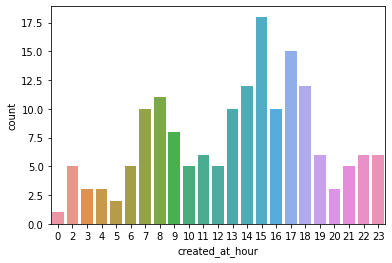

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


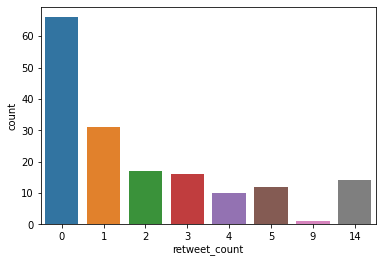

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


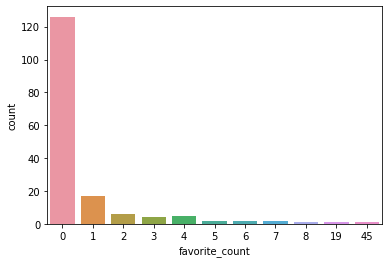

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


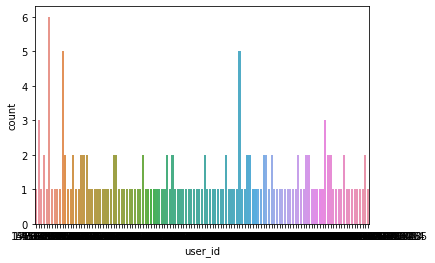

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


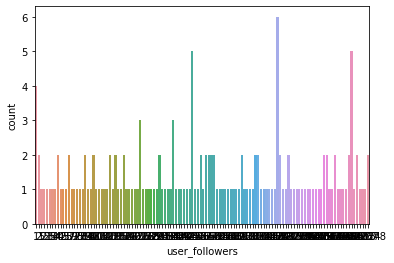

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


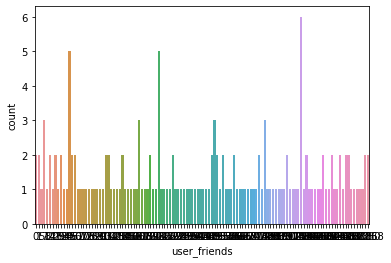

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


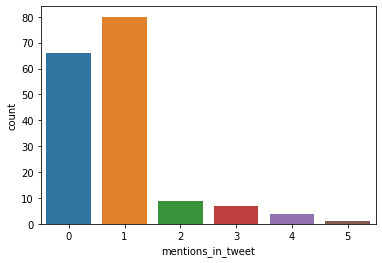

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


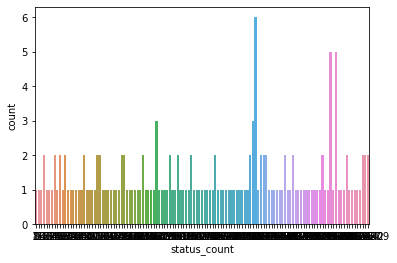

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


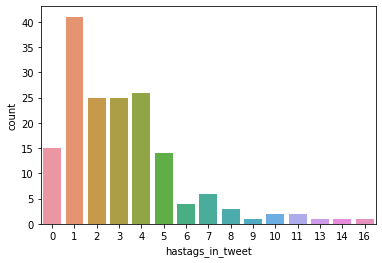

In [ ]:
for col in df_num:
 sns.countplot(df_num[col])
 plt.show()

## Tratamiento 'user_friends'


*  Atipicos =   1157.56 + 1,5 * 2938.8 = 5565
*  Atipicos extremo =  la media + 3 * std = 9973


Proponemos que los usuarios con mas de 5,5k seguidos tomarlos como atipicos.

Pasamos a NaN e imputamos???

count      167.000000
mean      1157.568862
std       2938.826420
min          0.000000
25%        108.000000
50%        393.000000
75%        903.500000
max      22158.000000
Name: user_friends, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


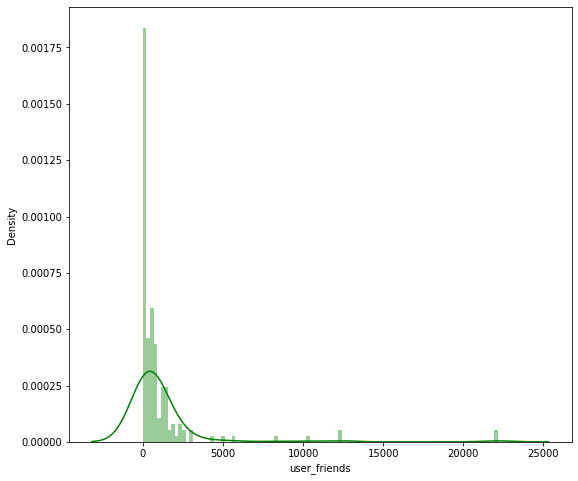

In [ ]:
print(df['user_friends'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['user_friends'], color='g', bins=100, hist_kws={'alpha': 0.4});

## Tratamiento 'user_followers'

*  Atipicos =   6891.64 + 1,5 * 19611,3 = 36308
*  Atipicos extremo =  6891.64 + 3 * 19611,3 = 65725


Pasamos a NaN e imputamos???


count       167.000000
mean       6891.646707
std       19611.297636
min           1.000000
25%         144.500000
50%         565.000000
75%        1766.500000
max      122378.000000
Name: user_followers, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


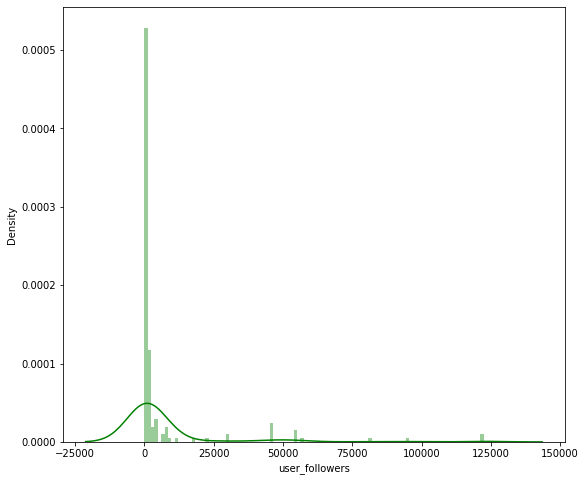

In [ ]:
print(df['user_followers'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['user_followers'], color='g', bins=100, hist_kws={'alpha': 0.4});

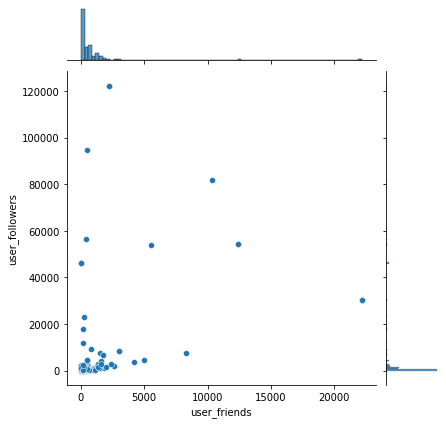

In [ ]:
sns.jointplot(x='user_friends', y='user_followers', data=df, kind='scatter') #  hue = 'user_verified'
plt.show()

## Tratamiento 'hastags_in_tweet'

*  Atipicos =   3,13 + 1,5 * 2,75 = 7.25
*  Atipicos extremo =  3,13 + 3 * 2,75 = 11.38

count    167.000000
mean       3.137725
std        2.757064
min        0.000000
25%        1.000000
50%        3.000000
75%        4.000000
max       16.000000
Name: hastags_in_tweet, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


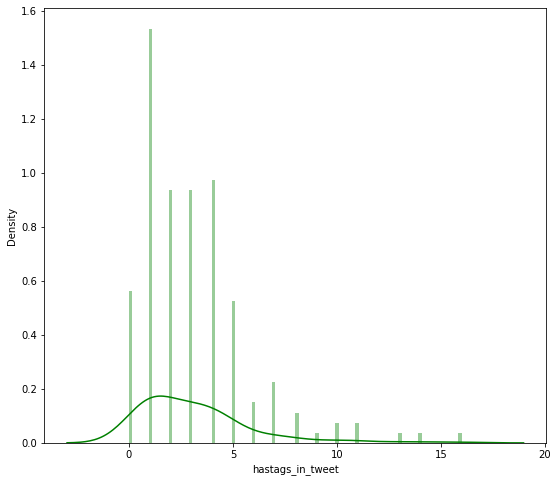

In [ ]:
print(df['hastags_in_tweet'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['hastags_in_tweet'], color='g', bins=100, hist_kws={'alpha': 0.4});

## Tratamiento 'status_count'

*  Atipicos =   78148 + 1,5 * 204349 = 384671
*  Atipicos extremo =  78148 + 3 * 204349 = 691195

count    1.670000e+02
mean     7.814811e+04
std      2.043497e+05
min      1.000000e+00
25%      2.396000e+03
50%      1.361200e+04
75%      4.586100e+04
max      1.424909e+06
Name: status_count, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


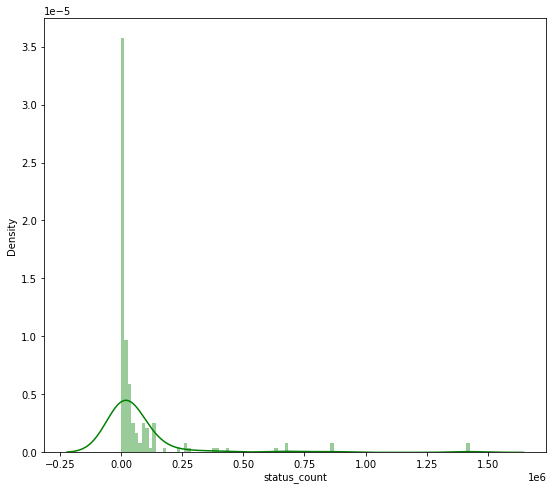

In [ ]:
print(df['status_count'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['status_count'], color='g', bins=100, hist_kws={'alpha': 0.4});

## Tratamiento 'mentions_in_tweet'

*  Atipicos =  la media + 1,5 * std = 2.25
*  Atipicos extremo =  la media + 3 * std = 3.68

count    167.000000
mean       0.838323
std        0.952595
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        5.000000
Name: mentions_in_tweet, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


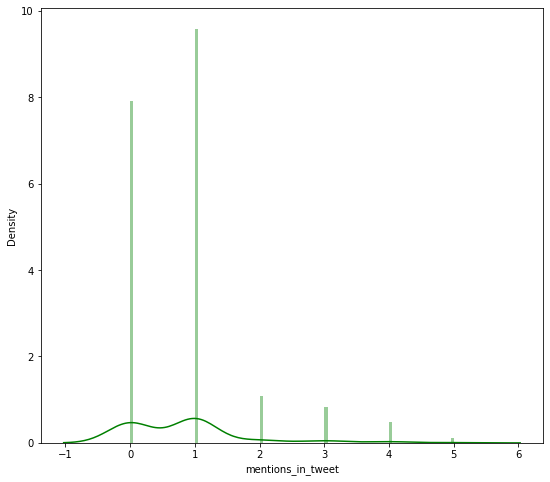

In [ ]:
print(df['mentions_in_tweet'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['mentions_in_tweet'], color='g', bins=100, hist_kws={'alpha': 0.4});

## Tratamiento 'favorite_count'

*  Atipicos =  la media + 1,5 * std = 7
*  Atipicos extremo =  la media + 3 * std = 13

count    167.000000
mean       1.011976
std        3.999982
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       45.000000
Name: favorite_count, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


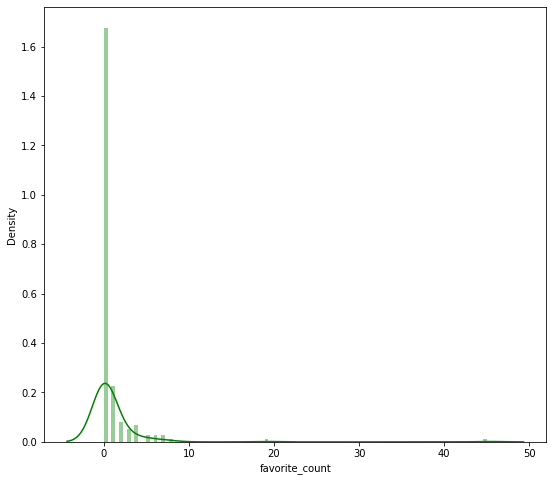

In [ ]:
print(df['favorite_count'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['favorite_count'], color='g', bins=100, hist_kws={'alpha': 0.4});

## Tratamiento 'retweet_count'

*  Atipicos = la media + 1,5 * std = 8.28
*  Atipicos extremo = la media + 3 * std = 14

count    167.000000
mean       2.502994
std        3.866561
min        0.000000
25%        0.000000
50%        1.000000
75%        3.000000
max       14.000000
Name: retweet_count, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


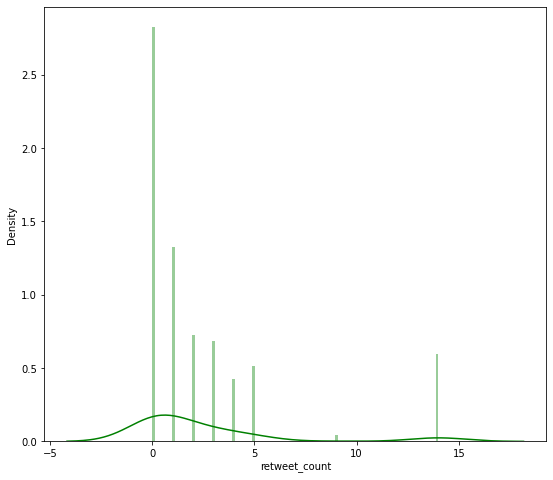

In [ ]:
print(df['retweet_count'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['retweet_count'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167 entries, 0 to 166
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   text                        167 non-null    object
 1   created_at                  167 non-null    object
 2   created_at_time             167 non-null    object
 3   created_at_hour             167 non-null    int64 
 4   retweeted                   167 non-null    object
 5   retweet_count               167 non-null    int64 
 6   favorite_count              167 non-null    int64 
 7   user_ verified              0 non-null      object
 8   user_id                     167 non-null    int64 
 9   user_name                   167 non-null    object
 10  user_location               167 non-null    object
 11  user_notificacion           167 non-null    object
 12  user_followers              167 non-null    int64 
 13  user_friends                167 non-null    int64 

# Tratamiento de variables categóricas

### Tratamiento 'source_device'

Meter de qpev20212 pabajo en una categoría

In [ ]:
df['source_device'].value_counts()

Twitter for Android    113
Twitter Web App         53
Twitter for iPhone      23
TweetDeck               13
qpev20212                8
Hootsuite Inc.           6
dlvr.it                  5
Twitter for iPad         3
BrenpCom                 2
Buffer                   2
Postcron App             1
de.elyex.com             1
ecu11                    1
FIUPM Bot                1
elyex.com                1
Metricool                1
EcuaBot 2.0              1
Name: source_device, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9917 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9917 missing from current font.
  font.set_text(s, 0, flags=flags)


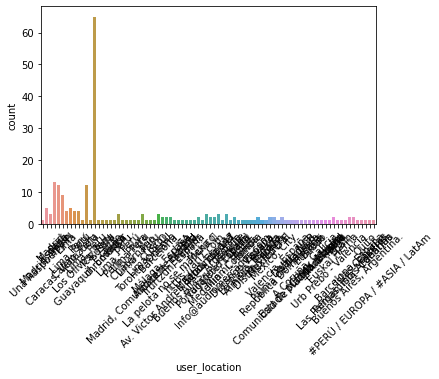

In [ ]:
 sns.countplot(df['source_device'])
 plt.xticks(rotation=45)
plt.xticks(fontsize=10)
 plt.show()

# Tratamiento 'user_location'

In [ ]:
df['user_location'].value_counts()

                      65
España                13
Lima, Peru            12
Perú                  12
Caracas, Venezuela     9
                      ..
callao                 1
lima - peru            1
Delhi - NCR            1
E.U                    1
México                 1
Name: user_location, Length: 84, dtype: int64

In [ ]:
df.isnull().sum()

text                            0
created_at                      0
created_at_time                 0
created_at_hour                 0
retweeted                       0
retweet_count                   0
favorite_count                  0
user_ verified                235
user_id                         0
user_name                       0
user_location                   0
user_notificacion               0
user_followers                  0
user_friends                    0
user_withheld_in_countries      0
mentions_in_tweet               0
is_reply                        0
source_device                   0
finished_tweet                  0
status_count                    0
hashtags_text                   0
hastags_indices                 0
hastags_in_tweet                0
URLs                            0
dtype: int64

## Tratamiento variables categóricas


In [ ]:
pd.value_counts(titanic['class'])

## Análisis de emojis


In [ ]:
# Download emoji sentiment
!wget https://www.clarin.si/repository/xmlui/handle/11356/1048/allzip
!unzip allzip
!pip install emoji_extractor
!pip install emoji

--2021-07-15 15:46:10--  https://www.clarin.si/repository/xmlui/handle/11356/1048/allzip
Resolving www.clarin.si (www.clarin.si)... 95.87.154.205
Connecting to www.clarin.si (www.clarin.si)|95.87.154.205|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘allzip’

allzip                  [  <=>               ]  94.61K   369KB/s    in 0.3s    

2021-07-15 15:46:11 (369 KB/s) - ‘allzip’ saved [96878]

Archive:  allzip
  inflating: ESR_v1.0_format.txt     
  inflating: Emoji_Sentiment_Data_v1.0.csv  
  inflating: Emojitracker_20150604.csv  
  Created wheel for emoji-extractor: filename=emoji_extractor-1.0.19-cp37-none-any.whl size=61586 sha256=465798009b8bc816c38b0eae82e1aacf2962f1999ed15a0451214361861e9324
  Stored in directory: /root/.cache/pip/wheels/87/bd/5f/e0108b9a84b63b2a0379397d5dada523360c26a46342d5c1a4
Successfully built emoji-extractor
     |████████████████████████████████| 133kB 5.3MB/s 


In [ ]:
from emoji_extractor.extract import Extractor

In [ ]:
# Vamosa generar el diccionario de emoticonos 
def load_emoji_sentiment(path):
  # Cargamos el csv de emoji_sentiment
  emoji_sent_df = pd.read_csv(path,sep=",")
  # Calculamos los scores dividiendo el número de emojis negativos y entre el total
  emoji_sent_df["Negative"] = emoji_sent_df["Negative"]/emoji_sent_df["Occurrences"]
  emoji_sent_df["Neutral"] = emoji_sent_df["Neutral"]/emoji_sent_df["Occurrences"]
  emoji_sent_df["Positive"] = emoji_sent_df["Positive"]/emoji_sent_df["Occurrences"]
  # Transformamos a dict
  emoji_sent_df = emoji_sent_df.set_index('Emoji')
  emoji_dict = emoji_sent_df.to_dict(orient="index")
  return emoji_dict

In [ ]:
# Función para extraer emojis del texto en formato lista
def extract_emojis(text):
  extract = Extractor()
  emojis = extract.count_emoji(text, check_first=False)
  emojis_list = [key for key, _ in emojis.most_common()]
  return emojis_list

In [ ]:
# Calcula el sentimiento de los emojis de una lista utilizando el diccionario
# de emoji sentiment score generado previamente con la función load_emoji_sentiment()
# Se puede extraer el valor de positividad de los emojis con la option "positive"
# Se puede extraer el valor de neutralidad de los emojis con la option "neutral""  
# Se puede extraer el valor de e negatividad de los emojis con la option "negative""  

def get_emoji_sentiment(lista, option = "positive"):
  output = 0
  for emoji in lista:
    try:
      if option == "positive":
        output = output + emoji_sent_dict[emoji]["Positive"]
      elif option =="negative":
        output = output + emoji_sent_dict[emoji]["Negative"]
      elif option =="neutral":
        output = output + emoji_sent_dict[emoji]["Neutral"]
    except Exception as e: 
      continue
  return output

In [ ]:
# Eliminar los emojis de un texto. Esto es útil porque una vez extraido los emojis
# puede interesarnos tener un texto sin presencia de emojis para mejor análisis.
def clean_emoji(text):
    # Poner todos los comandos de http://www.unicode.org/Public/emoji/1.0/emoji-data.txt
    emoji_pattern = re.compile("["
        u"\U0001F300-\U0001F6FF"  # symbols & pictographs
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u'\u2600-\u26FF\u2700-\u27BF'
        u'\u2934' u'\u2935' u'\u2B05' u'\u2B06' u'\u2B07' u'\u2B1B' u'\u2B1C' 
        u'\u2B50' u'\u2B55' u'\u3030' u'\u303D' u'\u3297' u'\u3299' u'\u00A9'
        u'\u00AE' u'\u203C' u'\u2049' u'\u2122' u'\u2139' u'\u2194-\u2199' 
        u'\u21A9' u'\u21AA' u'\u231A' u'\u231B' u'\u2328' u'\u23CF'
        u'\u23E9-\u23F3' u'\u23F8' u'\u23F9' u'\u23FA' u'\u24C2' u'\u25AA'
        u'\u25AB' u'\u25B6' u'\u25C0' u'\u25FB' u'\u25FD' u'\u25FC' u'\u25FE'
        ']+', flags=re.UNICODE)
    string2 = re.sub(emoji_pattern,r' ',text)
    return string2

In [ ]:
emoji_sent_dict = load_emoji_sentiment("Emoji_Sentiment_Data_v1.0.csv")

In [ ]:
emoji_sent_dict["🎉"]

{'Negative': 0.03822222222222222,
 'Neutral': 0.184,
 'Occurrences': 1125,
 'Position': 0.743635879,
 'Positive': 0.7777777777777778,
 'Unicode block': 'Miscellaneous Symbols and Pictographs',
 'Unicode codepoint': '0x1f389',
 'Unicode name': 'PARTY POPPER'}

In [ ]:
# Vamos a trabajar primero con los emojis
df["emoji_list"] = df["text_limpio"].apply(lambda x: extract_emojis(x))

In [ ]:
# vemos que hemos guardado en esta lista
df["emoji_list"]

0            []
1            []
2            []
3    [🗣, ✍, 🇻🇪]
4            []
Name: emoji_list, dtype: object

In [ ]:
df["sent_emoji_pos"] = df["emoji_list"].apply(lambda x: get_emoji_sentiment(x, "positive"))
df["sent_emoji_neu"] = df["emoji_list"].apply(lambda x: get_emoji_sentiment(x, "neutral"))
df["sent_emoji_neg"] = df["emoji_list"].apply(lambda x: get_emoji_sentiment(x, "negative"))

In [ ]:
df


,created_at,retweet_count,favorite_count,user_name,user_location,user_followers,user_verified,mentions_in_tweet,text,is_reply,source_device,finished_tweet,user_notificacion,user_withheld_in_countries,status_count,hashtags_text,hastags_indices,text_limpio,rt,url,emoji_list,sent_emoji_pos,sent_emoji_neu,sent_emoji_neg
0,Thu Jul 15 15:42:32 +0000 2021,9,0,Melissa58061855,,25,False,1,RT @ConElMazoDando: Sunad lanza la línea telef...,False,Twitter for Android,False,False,[],27473,CubaYVenezuelaUnaSolaBandera,"[[91, 120]]",Sunad lanza la línea telefónica 0800Sindrogas...,si,https://t.co/AuiHOHWfRE,[],0.0,0.0,0.0
1,Thu Jul 15 15:42:26 +0000 2021,0,0,AngelaTrivio3,,0,False,1,"@CNT_EC pésimo servicio, desde octubre 2020, t...",False,Twitter for iPad,False,False,[],7,,[],"@CNT_EC pésimo servicio, desde octubre 2020, t...",no,no,[],0.0,0.0,0.0
2,Thu Jul 15 15:42:24 +0000 2021,7,0,XxcvrenatoxX,Lima Perú,156,False,1,RT @MarvelLatin: James Gunn reveló que fue el ...,False,Twitter Web App,False,False,[],7962,,[],James Gunn reveló que fue el mismo Kevin Feig...,si,no,[],0.0,0.0,0.0
3,Thu Jul 15 15:42:22 +0000 2021,62,0,carmendelmila56,Venezuela,242,False,2,RT @Mippcivzla: 🗣️ ¡𝐓𝐨𝐦𝐚 𝐍𝐨𝐭𝐚!✍️ 🇻🇪 \nMin. de ...,False,Twitter for Android,False,False,[],47558,,[],"🗣️ ¡𝐓𝐨𝐦𝐚 𝐍𝐨𝐭𝐚!✍️ 🇻🇪 \nMin. de Ecosocialismo, ...",si,no,"[🗣, ✍, 🇻🇪]",1.0,0.0,0.0
4,Thu Jul 15 15:41:45 +0000 2021,3,0,MarcelaGuti23,,0,False,1,"RT @HuilaGob: Aún hay cupos para cursos ""Apren...",False,Twitter for Android,False,False,[],31,,[],"Aún hay cupos para cursos ""Aprende a hacer es...",si,no,[],0.0,0.0,0.0
